In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity
import nltk
from nltk.corpus import stopwords
%matplotlib inline

## Exploratory Data Analysis:

In [2]:
# Read CSV
df = pd.read_csv('../artifacts/netflix_titles.csv')
df.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...


### Shapes, types and non null count:

In [3]:
print(f"Dataframe shape:\n {df.shape}")
print("\n==================================")
print("\nDataframe info:")
df.info()

Dataframe shape:
 (8807, 12)


Dataframe info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8807 entries, 0 to 8806
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       8807 non-null   object
 1   type          8807 non-null   object
 2   title         8807 non-null   object
 3   director      6173 non-null   object
 4   cast          7982 non-null   object
 5   country       7976 non-null   object
 6   date_added    8797 non-null   object
 7   release_year  8807 non-null   int64 
 8   rating        8803 non-null   object
 9   duration      8804 non-null   object
 10  listed_in     8807 non-null   object
 11  description   8807 non-null   object
dtypes: int64(1), object(11)
memory usage: 825.8+ KB


### Unique values per column:

In [4]:
print("\nUnique Values in Each Column:")
for column in df.columns:
    print(f"{column}: {df[column].nunique()} unique values")


Unique Values in Each Column:
show_id: 8807 unique values
type: 2 unique values
title: 8807 unique values
director: 4528 unique values
cast: 7692 unique values
country: 748 unique values
date_added: 1767 unique values
release_year: 74 unique values
rating: 17 unique values
duration: 220 unique values
listed_in: 514 unique values
description: 8775 unique values


### Missing values:

In [5]:
missing_value = df.isnull().sum()
missing_percentage = (missing_value/len(df))*100
missing_df = pd.DataFrame({
    'Missing Value': missing_value,
    'Percentage': missing_percentage.round(2).astype(str) + '%'
})
print("\nMissing Value Analysis:")
print(missing_df[missing_df['Missing Value']>0].sort_values('Missing Value', ascending = False))

print("\n=============================================")
print("\nContent Type Distribution:")
print(df['type'].value_counts())


Missing Value Analysis:
            Missing Value Percentage
director             2634     29.91%
country               831      9.44%
cast                  825      9.37%
date_added             10      0.11%
rating                  4      0.05%
duration                3      0.03%


Content Type Distribution:
type
Movie      6131
TV Show    2676
Name: count, dtype: int64


### Release Year:

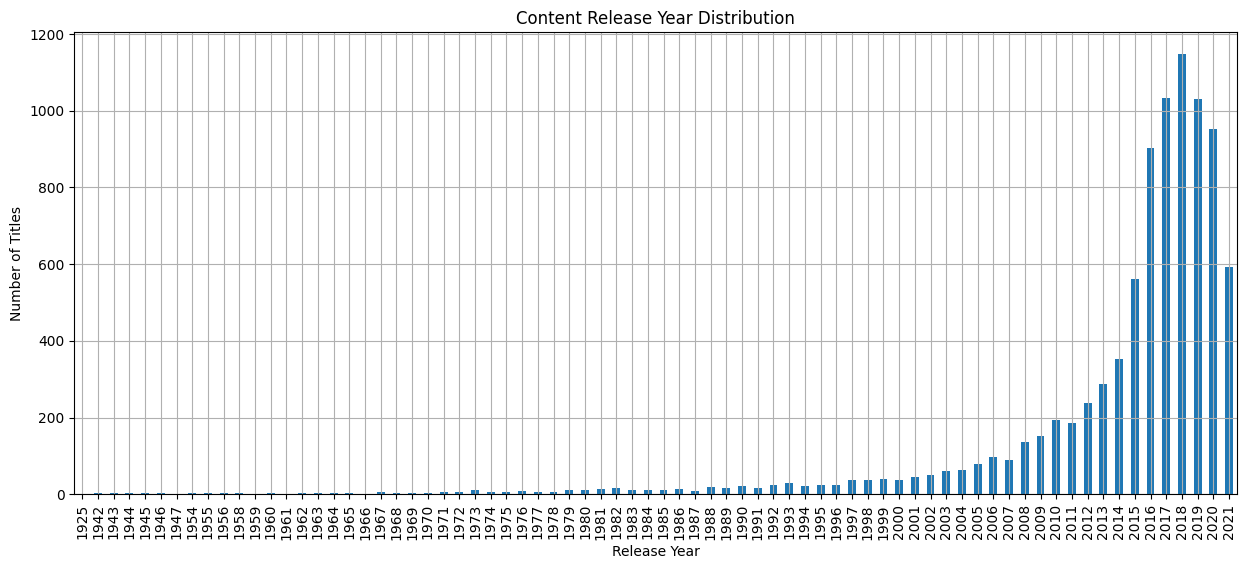

In [6]:
plt.figure(figsize = (15,6))
df['release_year'].value_counts().sort_index().plot(kind='bar')
plt.title('Content Release Year Distribution')
plt.xlabel('Release Year')
plt.ylabel('Number of Titles')
plt.grid(True)
plt.show()

### Rating distribution:

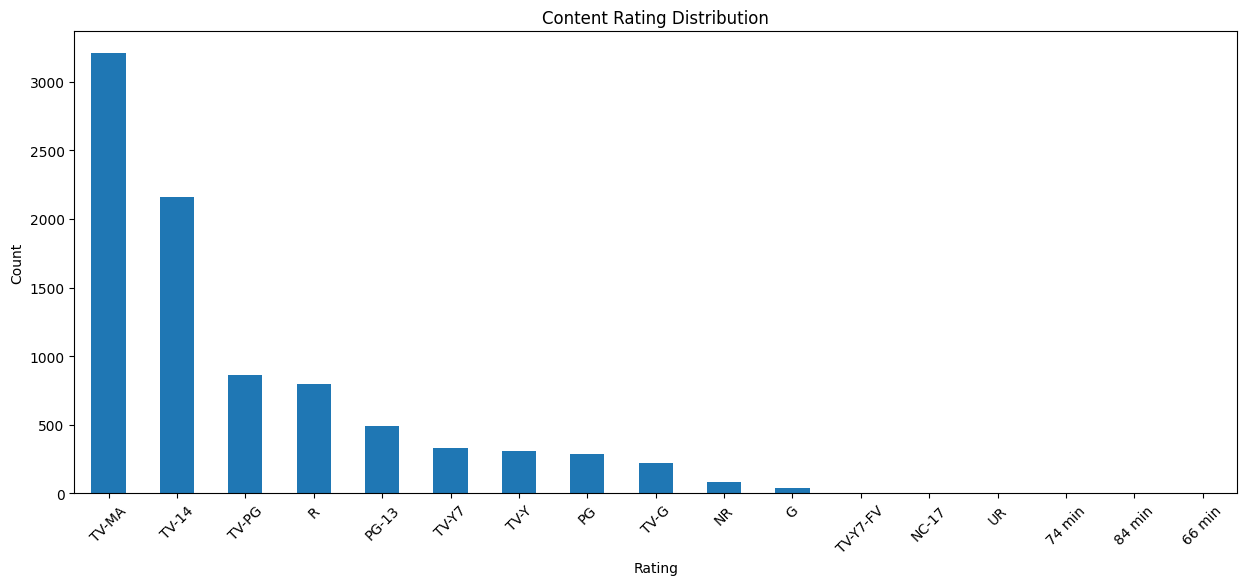

In [7]:
plt.figure(figsize = (15,6))
df['rating'].value_counts().plot(kind = "bar")
plt.title('Content Rating Distribution')
plt.xlabel('Rating')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()

### Categories dsitribution:

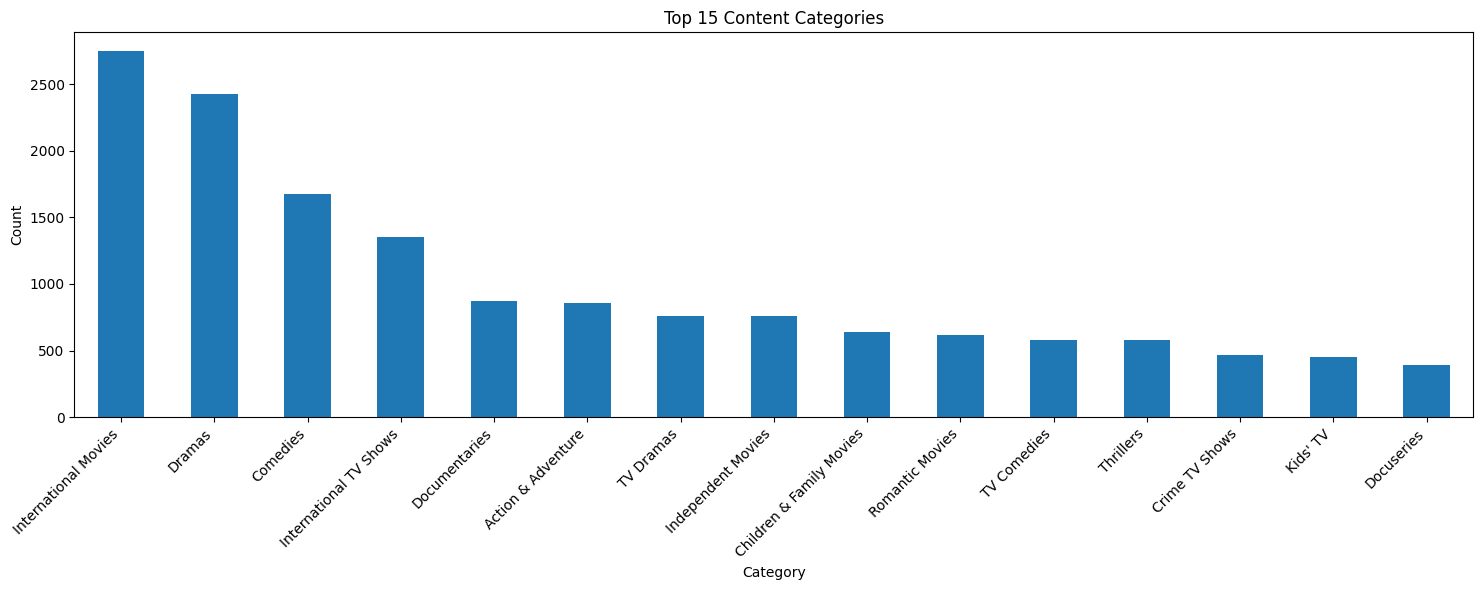

In [8]:
categories = df['listed_in'].dropna().str.split(', ').explode()
top_categories = categories.value_counts().head(15)

plt.figure(figsize=(15, 6))
top_categories.plot(kind='bar')
plt.title('Top 15 Content Categories')
plt.xlabel('Category')
plt.ylabel('Count')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

### Duration distribution:

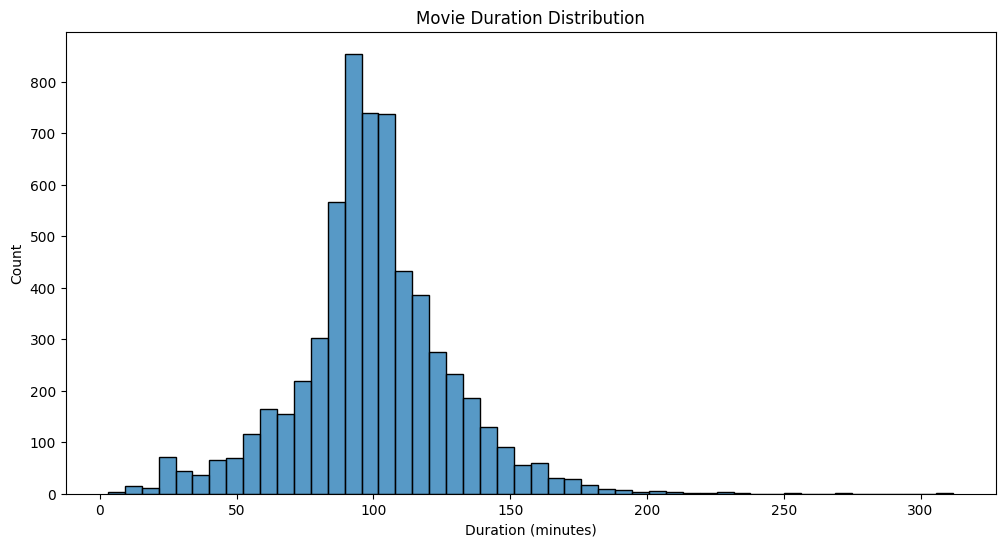

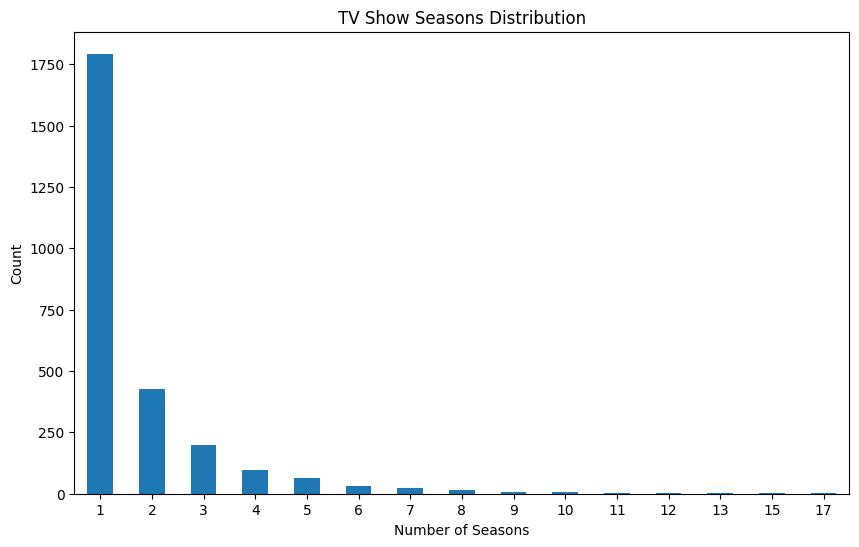

In [9]:
# Separate movies and TV shows
movies = df[df['type'] == 'Movie'].copy() 
tv_shows = df[df['type'] == 'TV Show'].copy()

# Convert movie duration to numeric (remove 'min' and convert to int)
movies['duration_num'] = movies['duration'].str.extract(r'(\d+)').astype(float)

# Plot movie duration distribution
plt.figure(figsize=(12, 6))
sns.histplot(data=movies, x='duration_num', bins=50)
plt.title('Movie Duration Distribution')
plt.xlabel('Duration (minutes)')
plt.ylabel('Count')
plt.show()

# Analyze TV show seasons
# Extract numbers from strings like "2 Seasons" using regex
tv_seasons = tv_shows['duration'].str.extract(r'(\d+)').astype(int).squeeze()
season_distribution = tv_seasons.value_counts().sort_index()

# Plot TV show seasons distribution
plt.figure(figsize=(10, 6))
season_distribution.plot(kind='bar')
plt.title('TV Show Seasons Distribution')
plt.xlabel('Number of Seasons')
plt.ylabel('Count')
plt.xticks(rotation=0)
plt.show()